# AVALUACIÓN CON TEXTO REAL

Para comprobar la utilidad de nuestro modelo, lo aplicaremos a un texto exogeno a los datos proporcionados. En este caso, hemos obtenido ayuda del ChatGPT para generar un texto anotado con POS y etiquetas de entidades. El fichero es el **ner.txt**. Dentro de este fichero encontramos diferentes oraciones basados en hechos y personajes reales. 

In [6]:
## ANALISIS EXPLORATORIO DE DATOS
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Funciones import *

In [7]:
def cargar_datos_ner(path, limite_frases=100):
    datos = []
    oracion = []

    with open(path, encoding='utf-8') as f:
        for linea in f:
            linea = linea.strip()
            if not linea:
                if oracion:
                    datos.append(oracion)
                    oracion = []
                    if len(datos) == limite_frases:
                        break
            else:
                partes = linea.split()
                if len(partes) == 3:
                    token, pos, tag = partes
                    oracion.append((token, pos, tag))
    return datos


In [8]:
data = cargar_datos_ner('ner.txt')
processed_data = prepare_data_for_crf(data)

## Resultados

Observamos que para la mayoría de las etiquetas predice sin sesgo, pero inevitablemente la confusión entre etiquetas de las entidades ORG y LOC persisten en muchas fuentes de datos. 

Loading pre-trained model from Modelos_Spanish/best_model_r1_B.crf.tagger...
Evaluating model on test data...

=== Entity-Level Evaluation Results ===
Precision: 0.6861
Recall: 0.6861
F1 Score: 0.6861

=== Entity-Level Confusion Matrix ===


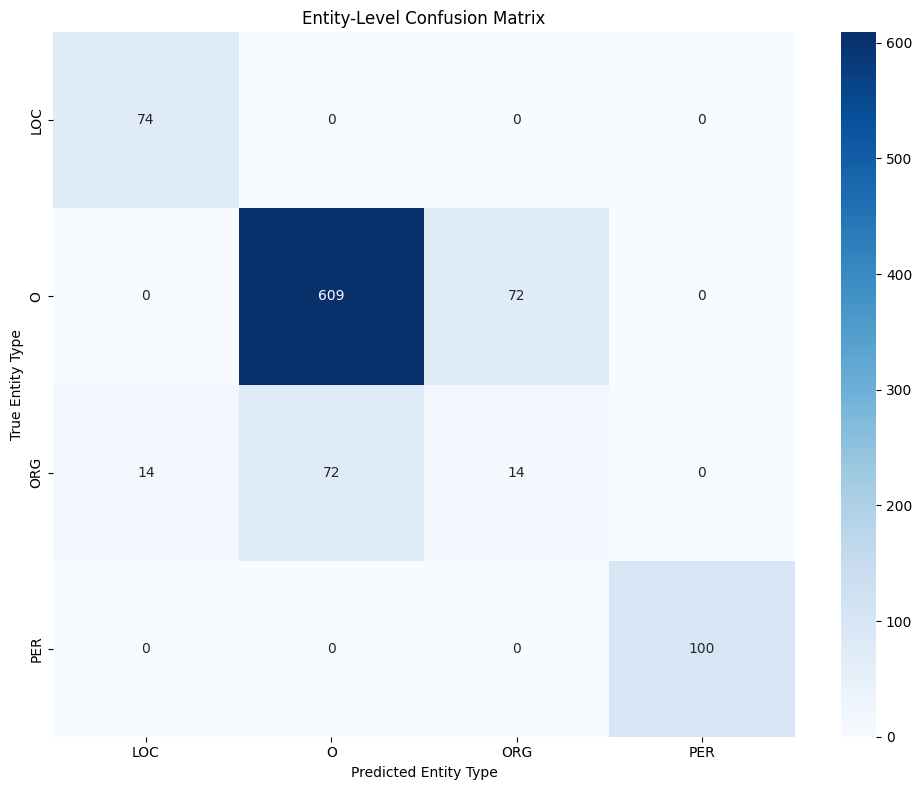


Most common entity type confusions:
  ORG mistaken as O: 72 times
  O mistaken as ORG: 72 times


In [9]:
model_path = 'Modelos_Spanish/best_model_r1_B.crf.tagger'

results = run_optimal_configuration(model_path=model_path, preprocessed_test=processed_data)
